# OpenClassrooms - Parcours Data Analyst Business Intelligence - P8

# Milestone 1 - Analyse des données

Dans cette partie nous allons analyser le jeu de données que nous avons à notre disposition. Notre objectif est de comprendre les relations entre les variables, et surtout, celles qui influent sur le prix des transactions immobilières. Grâce à ce travail, nous pourrons ne conserver que les variables qui seront utiles à l'apprentissage de notre algorithme.

## 1.Type des données

La première étape à réaliser est d'importer les données dans le notebook et d'opérer des transformations sur les variables si celles-ci s'imposent (exemple : nettoyage ou changement de type des variables, etc.).

In [6]:
#On importe les librairies que nous utiliserons pour traiter les données et les visualiser
import pandas as pd 
import numpy as np 

# N'oubliez pas d'avoir installé les librairies pandas, numpy et matplotlib via la commande pip
print('Les bibliothèques pandas et numpy sont installées et prêtes à être utilisées')

Les bibliothèques pandas et numpy sont installées et prêtes à être utilisées


In [7]:
#On importe les données dans un dataframe
df_historique = pd.read_excel('Historique immobilier Paris 2017-2021.xlsx')
df_historique.head()

,date_mutation,valeur_fonciere,adresse_numero,adresse_nom_voie,code_postal,nom_commune,code_type_local,type_local,surface_reelle
0,2017-01-03,5.505597e+05,8,RUE DES COUTURES SAINT GERVAIS,75003,Paris 3e Arrondissement,2,Appartement,50
1,2017-01-12,1.576492e+06,32,AV MARCEAU,75008,Paris 8e Arrondissement,2,Appartement,163
2,2017-01-10,6.577574e+05,52,RUE DU FAUBOURG SAINT HONORE,75008,Paris 8e Arrondissement,2,Appartement,66
3,2017-01-10,2.500868e+05,64,RUE DU VERTBOIS,75003,Paris 3e Arrondissement,2,Appartement,22
4,2017-01-13,1.762667e+05,25,RUE DES LAVANDIERES STE OPPORT,75001,Paris 1er Arrondissement,2,Appartement,15


Attention, si l'opération ci-dessus ne marche pas, il se peut que le package "openpyxl" ne soit pas présent sur votre ordinateur. Si c'est le cas vous pouvez l'installer en éxécutant la commande : pip install openpyxl ou conda install openpyxl.

In [9]:
#On vérifie que le type des données attribué par pandas est cohérent
df_historique.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26196 entries, 0 to 26195
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date_mutation     26196 non-null  datetime64[ns]
 1   valeur_fonciere   26196 non-null  float64       
 2   adresse_numero    26196 non-null  int64         
 3   adresse_nom_voie  26196 non-null  object        
 4   code_postal       26196 non-null  int64         
 5   nom_commune       26196 non-null  object        
 6   code_type_local   26196 non-null  int64         
 7   type_local        26196 non-null  object        
 8   surface_reelle    26196 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(3)
memory usage: 1.8+ MB


### 2. Regardons les différents types de biens immobiliers que nous avons dans nos données :

In [11]:
print('La liste des différents types de biens immobiliers que nous avons dans les données est :')
df_historique[['code_type_local', 'type_local']].drop_duplicates()

La liste des différents types de biens immobiliers que nous avons dans les données est :


,code_type_local,type_local
0,2,Appartement
18,4,Local industriel. commercial ou assimilé


On observe qu'il y a 2 types de biens, et que leurs codes types sont :
- 2 pour les appartements
- 4 pour les locaux industriels ou commerciaux

### 3. Nombre de transactions

In [14]:
#On vérifie le nombre de transactions que nous avons dans notre dataframe
print('Le nombre de transactions dans les données est : {:,}'.format(df_historique.shape[0]).replace(',',' '))
print('Le nombre de transactions pour les appartements dans les données est : {:,}'.format(df_historique[df_historique['type_local'] == 'Appartement'].shape[0]).replace(',',' '))
print('Le nombre de transactions pour les locaux commerciaux dans les données est : {:,}'.format(df_historique[df_historique['type_local'] == 'Local industriel. commercial ou assimilé'].shape[0]).replace(',',' '))

Le nombre de transactions dans les données est : 26 196
Le nombre de transactions pour les appartements dans les données est : 24 353
Le nombre de transactions pour les locaux commerciaux dans les données est : 1 843


### 4. Intervalle de l'historique des données

In [16]:
#On vérifie également la plage de l'historique disponible
print('La première date de transaction dans les données est le : {}'.format(df_historique['date_mutation'].min().strftime('%Y-%m-%d')))
print('La dernière date de transaction dans les données est le : {}'.format(df_historique['date_mutation'].max().strftime('%Y-%m-%d')))

La première date de transaction dans les données est le : 2017-01-02
La dernière date de transaction dans les données est le : 2021-12-31


## Commençons à analyser les données

Maintenant nous allons analyser les données historiques pour les 2 différents types de biens immobiliers en essayant d'identifier les relations entre les variables. Mais avant cela, il nous faudra pouvoir comparer les biens entre eux, et pour cela nous allons créer une colonne du prix au mètre carré.

In [19]:
# Calcul de la colonne
df_historique['prix_metre_carre'] = df_historique['valeur_fonciere'] / df_historique['surface_reelle']

Maintenant, analysons les appartements.

### 5. Evolution du prix au mètre carré des appartements dans Paris

In [22]:
#On retire les colonnes qui sont à priori inutiles ET nous allons nous concentrer sur les appartements dans un premier temps

#Nous retirons les colonnes apportant des informations redondantes et celles non pertinentes pour la suite de notre analyse :
colonnes_a_retirer = ['adresse_numero', 'adresse_nom_voie', 'nom_commune', 'code_type_local']
df_historique = df_historique.drop(colonnes_a_retirer, axis=1)

In [23]:
#Préparons un dataframe en regroupant les prix moyens de ventes des appartements par année avec la surface moyenne associée

#Récupérons l'année des transactions 
df_historique['année'] = df_historique['date_mutation'].dt.year

#Conservons uniquement les lignes "Appartements"
df_appartements = df_historique[df_historique['type_local'] == 'Appartement']

#Créons le data frame final et affichons le 
df_appartements_prix_moyens = df_appartements.groupby('année').agg({'valeur_fonciere': 'mean', 'surface_reelle': 'mean', 'prix_metre_carre' : 'mean'}).round(2).reset_index()
df_appartements_prix_moyens

,année,valeur_fonciere,surface_reelle,prix_metre_carre
0,2017,427963.24,44.63,9492.86
1,2018,448055.76,44.27,10031.40
2,2019,461950.06,43.36,10562.71
3,2020,462383.25,42.90,10674.87
4,2021,458771.51,43.48,10455.60


On constate sur la moyenne des prix de vente des appartements à Paris que la tendance est à la hausse excepté pour l'année 2021\
Nous allons créer un graphique pour mieux le visualiser.

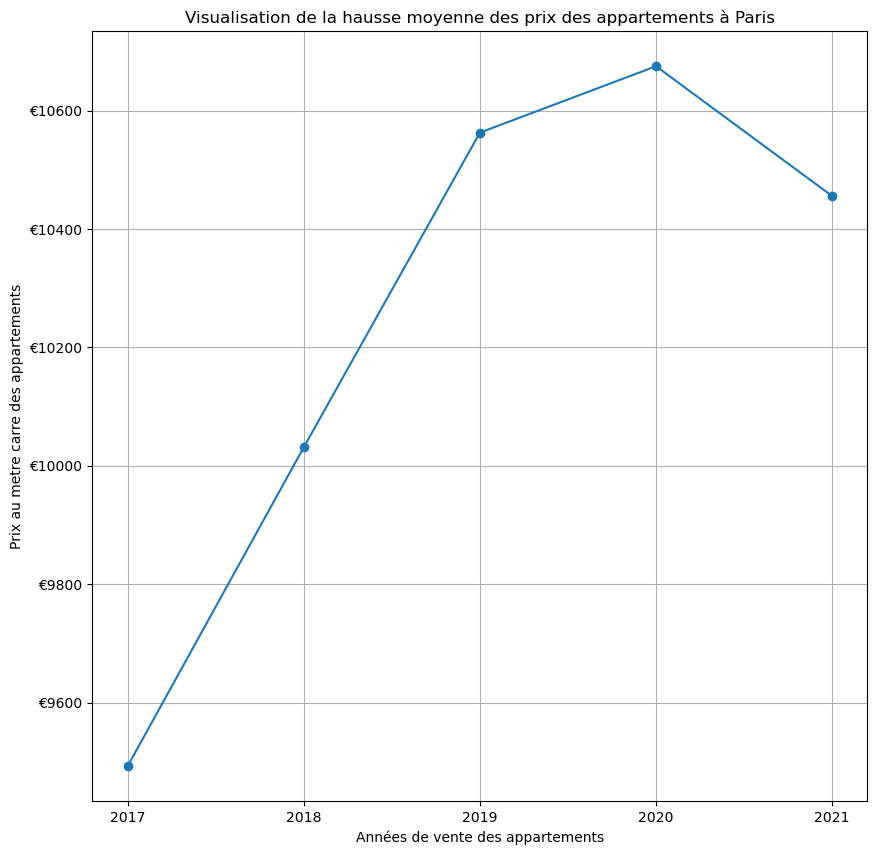

In [25]:
#Création d'un graphique pour visualiser la hausse de la moyenne des prix
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
plt.figure(figsize=(10,10))
plt.plot(['2017','2018','2019','2020','2021'],df_appartements_prix_moyens['prix_metre_carre'], marker='o')
plt.xlabel('Années de vente des appartements')
plt.ylabel('Prix au metre carre des appartements')
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid()
plt.title('Visualisation de la hausse moyenne des prix des appartements à Paris')
plt.show()

### 6. Différences de prix au mètre carré entre les arrondissements

Maintenant nous allons chercher à afficher l'évolution des prix par arrondissement. Vérifions la liste des arrondissements que nous avons dans nos données. Normalement à Paris nous avons 20 codes postaux différents, 1 par arrondissement allant de 75001 à 75020.

In [28]:
#Liste des codes postaux dans nos données
sorted(df_historique['code_postal'].unique())

[75001,
 75002,
 75003,
 75004,
 75005,
 75006,
 75007,
 75008,
 75009,
 75010,
 75011,
 75012,
 75013,
 75014,
 75015,
 75016,
 75017,
 75018,
 75019,
 75020]

In [29]:
#Créons un dataframe pour une deuxième visualisation avec l'évolution des prix par arrondissement et affichons le
df_appartements_prix_arrondissement = df_appartements.groupby(['code_postal','année']).agg({'valeur_fonciere': 'mean', 'surface_reelle': 'mean', 'prix_metre_carre' : 'mean'}).round(2).reset_index()
df_appartements_prix_arrondissement

,code_postal,année,valeur_fonciere,surface_reelle,prix_metre_carre
0,75001,2017,530392.41,45.24,11762.71
1,75001,2018,581390.37,46.01,12621.23
2,75001,2019,454606.24,34.31,13269.26
3,75001,2020,601204.89,44.87,13405.99
4,75001,2021,639321.08,47.78,13379.50
...,...,...,...,...,...
95,75020,2017,313979.41,39.78,7886.02
96,75020,2018,316909.31,37.34,8485.16
97,75020,2019,322005.37,35.38,9093.99
98,75020,2020,316868.86,33.94,9329.31


In [30]:
#Importation de la librairie warnings pour ignorer les alertes de contrôle
import warnings
warnings.simplefilter("ignore")

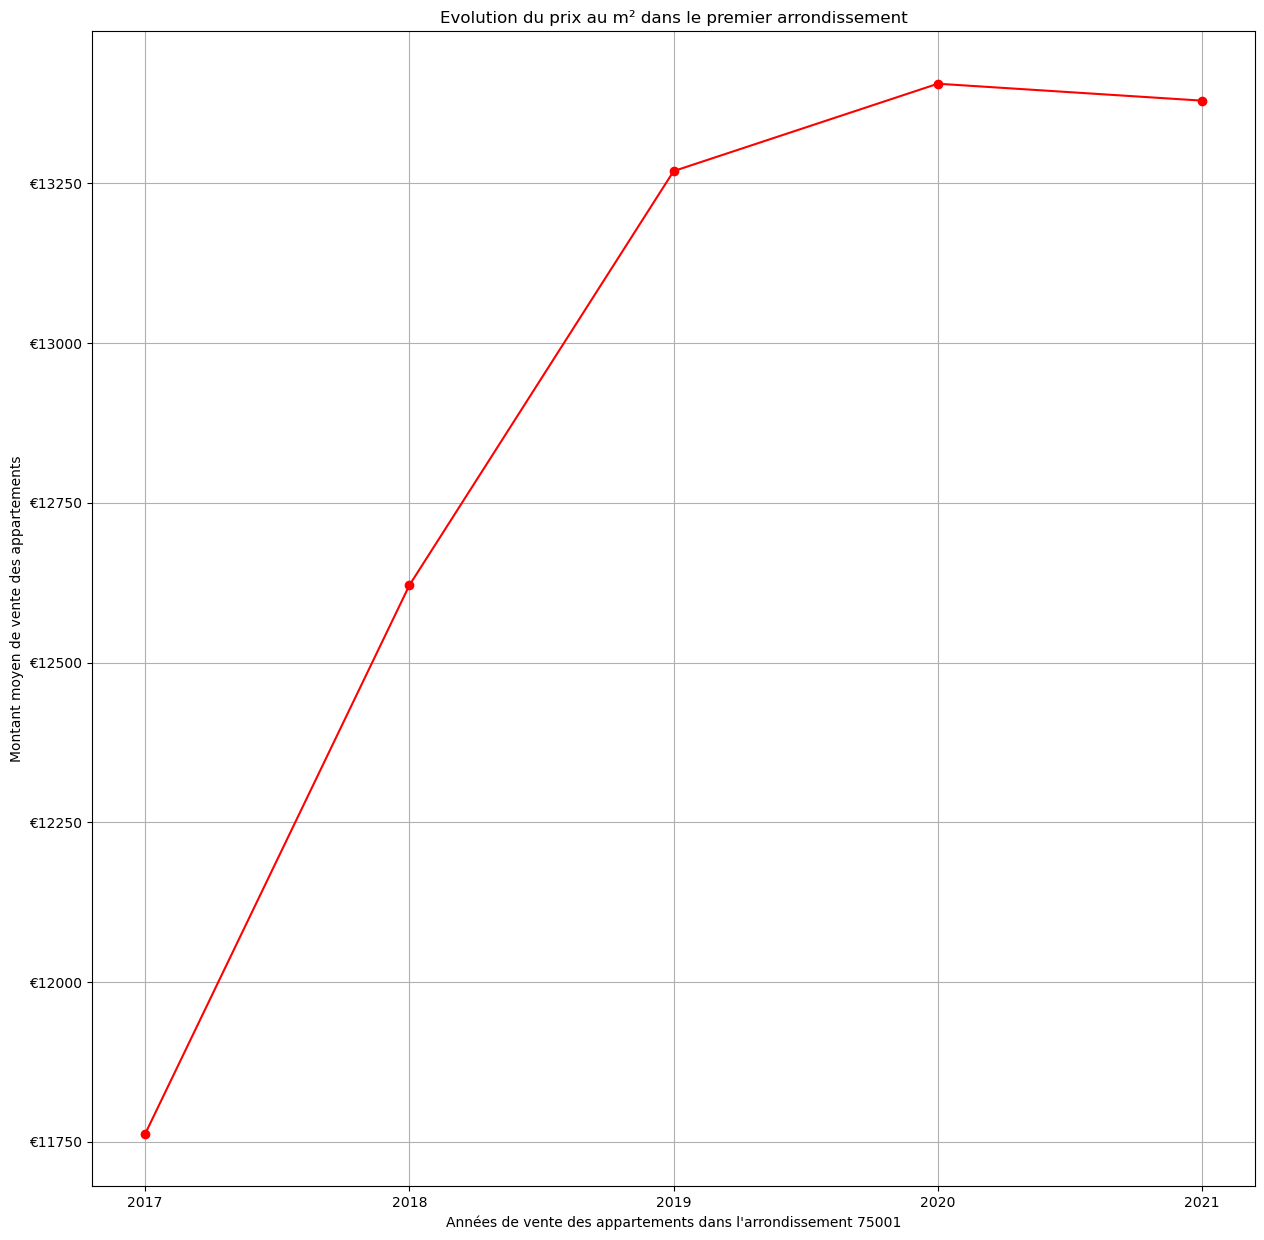

In [31]:
#Création d'un graphique pour visualiser la hausse de la moyenne des prix au mètre carré dans le premier arrondissement
df_75001 = df_appartements_prix_arrondissement[df_appartements_prix_arrondissement['code_postal'] == 75001]

plt.figure(figsize=(15,15))
plt.plot(['2017','2018','2019','2020','2021'], df_75001['prix_metre_carre'], color='red', marker='o')
plt.xlabel("Années de vente des appartements dans l'arrondissement 75001")
plt.ylabel('Montant moyen de vente des appartements')
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid()
plt.title('Evolution du prix au m² dans le premier arrondissement')
plt.show()

Nous allons ajouter à cette visualisation tous les autres arrondissements avec une couleur différente.

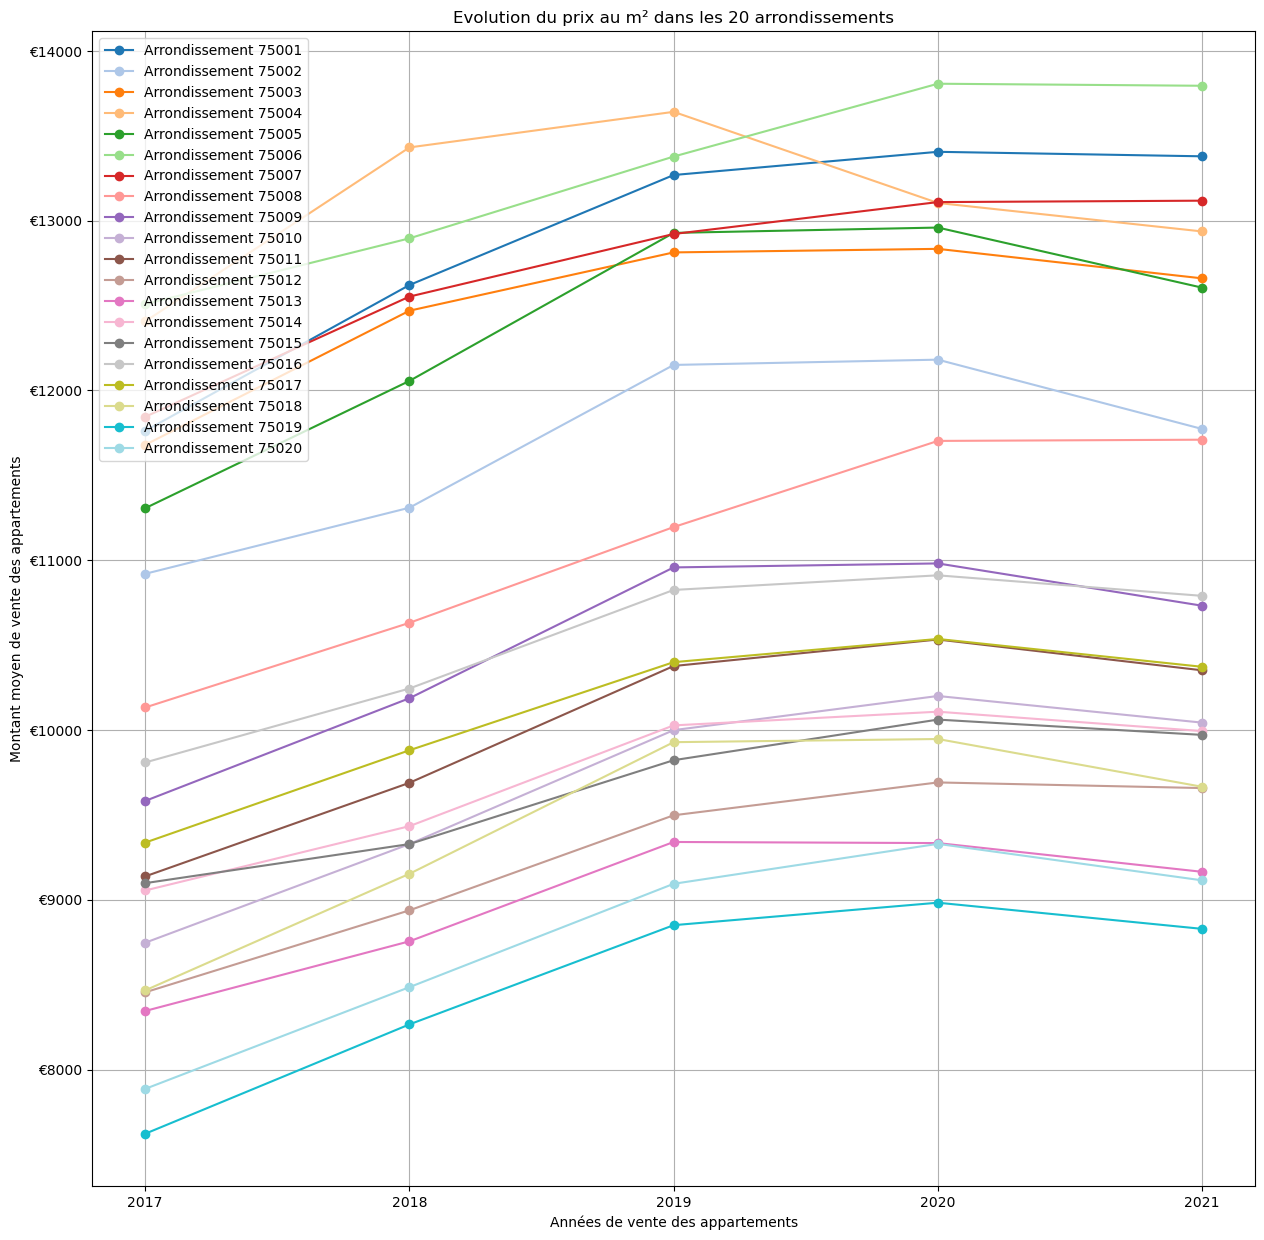

In [33]:
#On affiche l'évolution du prix au m² par arrondissement dans Paris
plt.figure(figsize=(15,15))
intervalle_historique=['2017','2018','2019','2020','2021']
liste_code_postal = df_appartements_prix_arrondissement['code_postal'].unique()
palette_couleurs = plt.cm.get_cmap('tab20', 20)

#Insérer les lignes à tracer ci-dessous
for index, arrondissement in enumerate(liste_code_postal):
    df_arrondissement = df_appartements_prix_arrondissement[df_appartements_prix_arrondissement['code_postal'] == arrondissement]
    plt.plot(intervalle_historique, df_arrondissement['prix_metre_carre'], marker='o', color=palette_couleurs(index), label=f'Arrondissement {arrondissement}')
    
plt.xlabel('Années de vente des appartements')
plt.ylabel('Montant moyen de vente des appartements')
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid()
plt.title('Evolution du prix au m² dans les 20 arrondissements')
plt.legend(loc='upper left')
plt.show()

On observe que globalement les prix moyens augmentent chaque année, mais qu'à partir de 2020 la tendance est à la baisse ou à la stabilité en fonction des arrondissements. Les prix au m² sont plus élevés dans les arrondissements suivants : 75006, 75001, 75007, 75004,75003 et 75005.

### 7. Prix au mètre carré par transaction dans un arrondissement

In [36]:
#Vérifions le nombre de transactions dans le 6ème car le prix semble élevé
print('Le nombre de transactions dans le 6ème arrondissement est : {}'.format(df_appartements[df_appartements['code_postal'] == 75006].shape[0]))

Le nombre de transactions dans le 6ème arrondissement est : 709


On constate que le 6ème arrondissement de Paris a enregistré 709 transactions immobilières. Il est possible que la demande soit plus importante dans cette zone, d'où les prix plus conséquents.

Affichons l'historique des transactions pour visualiser la dispersion des données :

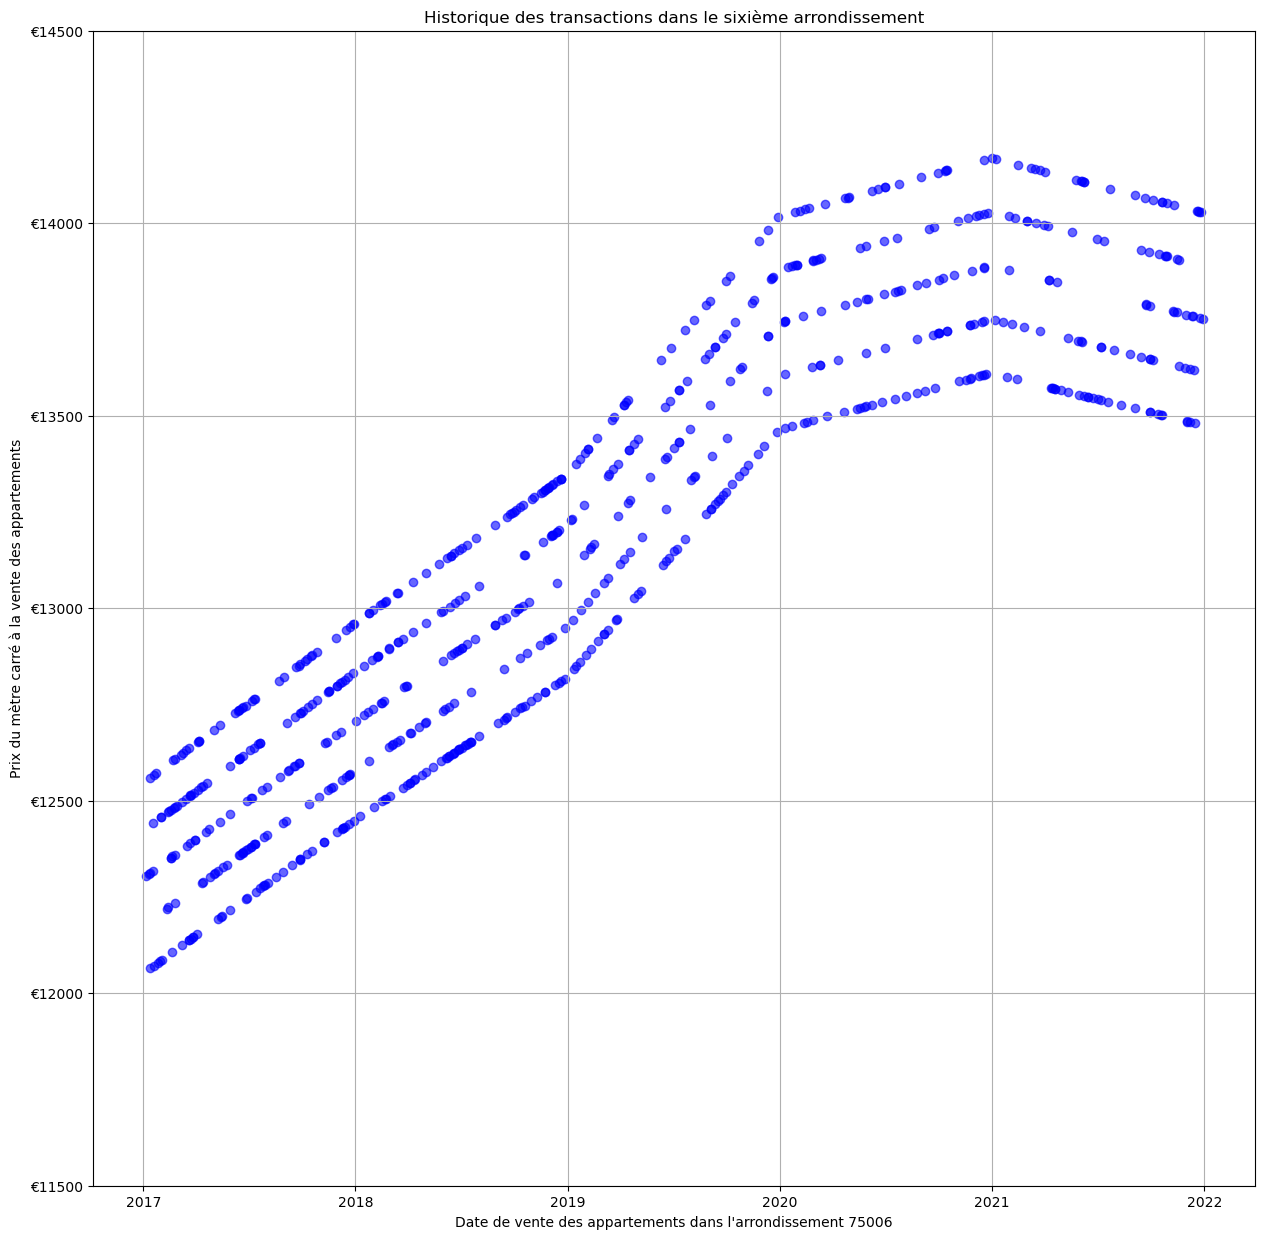

In [38]:
cp=75006
df_75006 = df_appartements[df_appartements['code_postal'] == cp]
plt.figure(figsize=(15,15))

#Insérer ci-dessous le scatter plot
plt.scatter(df_75006['date_mutation'], df_75006['prix_metre_carre'], color='blue', alpha=0.6)

plt.xlabel("Date de vente des appartements dans l'arrondissement 75006")
plt.ylabel('Prix du mètre carré à la vente des appartements')
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.ylim(11500, 14500)
plt.grid(which='both')
plt.title('Historique des transactions dans le sixième arrondissement')
plt.show()

On observe que la majorité des transactions fluctue dans des intervalles de prix moyens entre 12K€ et 14K€. Ce qui explique les prix élevés constatés.

Pour nous rassurer sur la relation entre les données nous allons utiliser un test statistique de corrélation.

### 8. Vérification de la relation entre le prix au m² et la date dans le 6ème arrondissement par le calcul du coefficient de corrélation de Pearson 

Pour cette distribution nous allons calculer le coefficient de corrélation de Pearson. La relation entre le prix au mètre carré et la date n'est pas forcément linéaire mais elle s'en rapproche suffisamment pour que cette analyse soit pertinente (voir l'évolution du prix au mètre carré globale montrée plus haut, on a presque une droite sauf entre 2020 et 2021). Ce qui nous interesse c'est de prouver que le temps a une influence sur le prix.

In [42]:
#On calcule la corrélation de Pearson
from scipy import stats

correlation, p_value = stats.pearsonr(df_75006['date_mutation'].astype('int64'), df_75006['prix_metre_carre'])

print(f"Coefficient de corrélation de Pearson entre le prix au m² et la date : {correlation:.4f}")
print(f"Valeur p : {p_value:.2f}")

Coefficient de corrélation de Pearson entre le prix au m² et la date : 0.9038
Valeur p : 0.00


Le coefficient de corrélation est de 0,9038 avec une pvalue de 0 donc nous pouvons confirmer la corrélation.

### 9. Vérification de la relation entre la valeur foncière et la surface

In [45]:
#On calcule la corrélation de Pearson
correlation, p_value = stats.pearsonr(df_75006['valeur_fonciere'], df_75006['surface_reelle'])

print(f"Coefficient de corrélation de Pearson : {correlation:.4f}")
print(f"Valeur p: {p_value:.2f}")

Coefficient de corrélation de Pearson : 0.9978
Valeur p: 0.00


Le coefficient de corrélation est de 0,9978 avec une pvalue de 0. La relation est donc confirmée.

Regardons maintenant si le type de bien à une influence sur le prix au mètre carré également.

### 10. Analyse des locaux industriels, commerciaux et assimilés 

In [49]:
#On crée un dataset qui ne contient que les locaux commerciaux
df_locaux_commerciaux = df_historique[df_historique['type_local'] == 'Local industriel. commercial ou assimilé']

In [50]:
#Préparons un dataframe en regroupant les prix au mètre carré moyens des ventes par année
df_locaux_commerciaux_prix_moyens = df_locaux_commerciaux.groupby('année').agg({'valeur_fonciere': 'mean', 'surface_reelle': 'mean', 'prix_metre_carre' : 'mean'}).round(2).reset_index()
df_locaux_commerciaux_prix_moyens

,année,valeur_fonciere,surface_reelle,prix_metre_carre
0,2017,965459.45,89.99,10949.91
1,2018,1003463.18,88.10,11569.50
2,2019,992822.16,82.83,11960.13
3,2020,1034380.46,85.63,11966.47
4,2021,1129357.18,92.83,12006.49


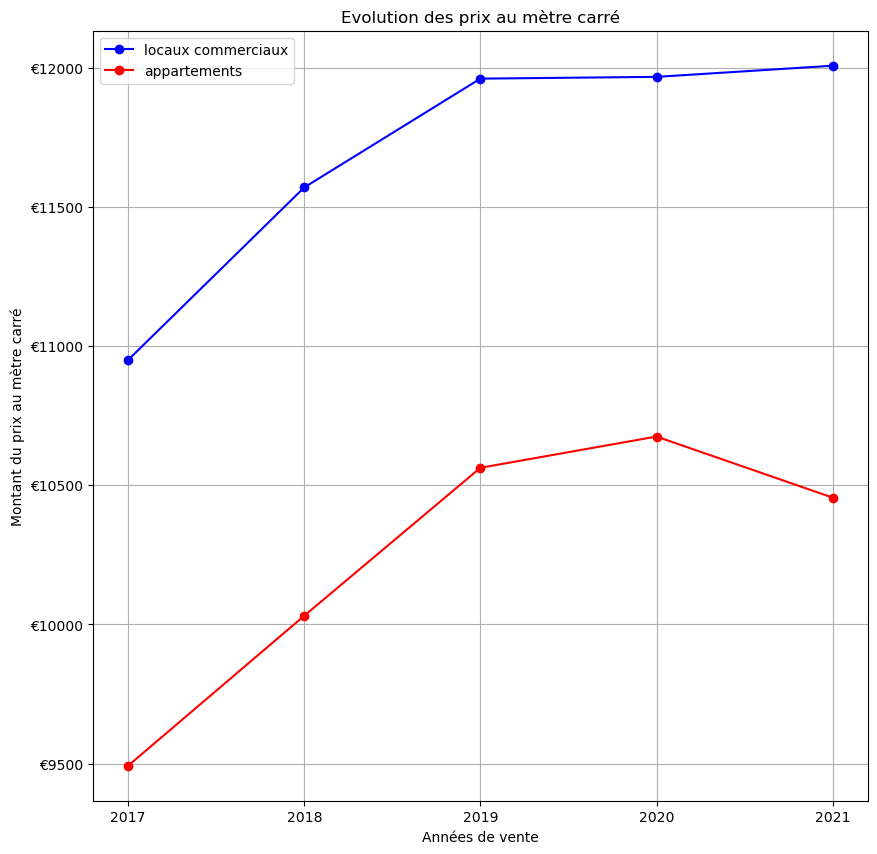

In [51]:
#Création d'un graphique pour visualiser la hausse de la moyenne des prix
plt.figure(figsize=(10,10))
plt.plot(['2017','2018','2019','2020','2021'], df_locaux_commerciaux_prix_moyens['prix_metre_carre'], label='locaux commerciaux',color='blue', marker='o')
plt.plot(['2017','2018','2019','2020','2021'], df_appartements_prix_moyens['prix_metre_carre'], label='appartements',color='red', marker='o')
plt.xlabel('Années de vente')
plt.ylabel('Montant du prix au mètre carré')
plt.legend()
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid()
plt.title('Evolution des prix au mètre carré')
plt.show()

Sur les 5 dernières années, le prix moyen au mètre carré des locaux commerciaux est plus élevé (entre 11K€ et 12K€) que celui des appartements.

Après ces analyses, nous pouvons conclure que les dimensions à utiliser pour prédire le prix au m² sont : 
- la surface du bien immobilier,
- la date considérée, 
- la localisation (code_postal), 
- le type de bien.

# Milestone 2 - Entraînement de l'algorithme

Dans cette section nous allons maintenant entraîner un algorithme à prédire la valeur foncière d'un bien immobilier. Pour cela nous allons utiliser l'algorithme de régression linéaire.

On commence par préparer nos données en transformant les colonnes catégoriques du code postal et du type de local grâce au one hot encoder (sklearn) / get_dummies (pandas)

In [57]:
#Encodage
pd.set_option('display.max_columns', None)
df_algorithme = df_historique[['valeur_fonciere', 'surface_reelle', 'année', 'code_postal', 'type_local']]

df_algorithme = pd.get_dummies(df_algorithme, columns=['code_postal', 'type_local'])
df_algorithme = df_algorithme.astype(int)
df_algorithme

,valeur_fonciere,surface_reelle,année,code_postal_75001,code_postal_75002,code_postal_75003,code_postal_75004,code_postal_75005,code_postal_75006,code_postal_75007,code_postal_75008,code_postal_75009,code_postal_75010,code_postal_75011,code_postal_75012,code_postal_75013,code_postal_75014,code_postal_75015,code_postal_75016,code_postal_75017,code_postal_75018,code_postal_75019,code_postal_75020,type_local_Appartement,type_local_Local industriel. commercial ou assimilé
0,550559,50,2017,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1576492,163,2017,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,657757,66,2017,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,250086,22,2017,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,176266,15,2017,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26191,471223,37,2021,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
26192,1982330,150,2021,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
26193,312435,26,2021,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
26194,156223,13,2021,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


On utilise le train_test_split pour prélever un tiers de nos données (33%) et les garder de côté. Nous allons entraîner notre algorithme sur le reste des données et puis mesurer notre erreur moyenne en pourcentage de la valeur foncière

In [59]:
#On importe le train test split de la librairie sk_learn
from sklearn.model_selection import train_test_split

#La valeur y à trouver est la valeur foncière
X = df_algorithme.drop('valeur_fonciere', axis=1)
y = df_algorithme['valeur_fonciere']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=13)

#Dimensions du dataset
print("Taille de X_train : ", X_train.shape)
print("Taille de X_test : ", X_test.shape)
print("Taille de y_train : ", y_train.shape)
print("Taille de y_test : ", y_test.shape)

Taille de X_train :  (17551, 24)
Taille de X_test :  (8645, 24)
Taille de y_train :  (17551,)
Taille de y_test :  (8645,)


In [60]:
from sklearn.linear_model import LinearRegression
#On entraîne l'algorithme ci-dessous et on effectue la prédiction
regression = LinearRegression()

regression.fit(X_train, y_train)

y_pred = regression.predict(X_test)

In [61]:
#Mesure de l'erreur moyenne
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
MAE = mean_absolute_error(y_test, y_pred)
MAPE = mean_absolute_percentage_error(y_test, y_pred)*100

print(f"Notre algorithme fait une erreur moyenne absolue de {MAE:,.0f}€.".replace(',', '\u202f'))
print(f"Cela équivaut à {MAPE:.2f}% d'erreur en moyenne sur la prédiction de la valeur foncière.")

Notre algorithme fait une erreur moyenne absolue de 33 727€.
Cela équivaut à 8.79% d'erreur en moyenne sur la prédiction de la valeur foncière.


In [62]:
print("Le prix moyen de l'ensemble des biens est de : {:,.0f}€".format(df_algorithme['valeur_fonciere'].mean()).replace(',',' '))

Le prix moyen de l'ensemble des biens est de : 491 616€


Notre algorithme fait donc 8,79% d'erreur en moyenne sur la prédiction de la valeur foncière.

Mes conclusions sur ce résultat et comment j'aurais pu aller plus loin :
- Le modèle de régression linéaire semble précis pour prédire les valeurs foncières. Les prix évoluent en fonction des caractéristiques du bien immobilier, cela suggère que la relation entre les différentes variables est en grande partie linéaire.
- L'erreur moyenne de 34K€ est acceptable par rapport au prix moyen de l'ensemble des biens (492K€).
- Pour affiner le modèle on aurait pu ajouter des variables supplémentaires comme la proximité des transports et des commerces ou essayer des modèles d'algorithmes plus complexes.

# Milestone 3 - Prédiction définitive pour le client 

Nous avons récupéré le fichier avec le portefeuille des actifs de la société. Nous allons l'importer puis effectuer la prédiction et statuer sur la branche qui, selon notre prédiction, aura le plus de valeur à la date demandée c'est à dire au 31 décembre 2022.<br>
Petite précision, nous souhaitons continuer à utiliser la surface réelle pour faire les calculs et pas la surface carrez. 

In [66]:
#On importe les données dans un dataframe
df_portefeuille = pd.read_excel('Portefeuille actifs.xlsx')
df_portefeuille.head()

,adresse_numero,adresse_nom_voie,code_postal,code_commune,nom_commune,surface_carrez,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,longitude,latitude
0,127,RUE SAINT-DENIS,75001,75101,Paris 1er Arrondissement,16.41,2,Appartement,25,1,2.349593,48.863227
1,62,RUE NOTRE-DAME DE NAZARETH,75003,75103,Paris 3e Arrondissement,20.47,2,Appartement,22,1,2.356977,48.867907
2,62,RUE DE TURENNE,75003,75103,Paris 3e Arrondissement,64.48,2,Appartement,65,3,2.364855,48.859318
3,32,AV GEORGE V,75008,75108,Paris 8e Arrondissement,63.29,2,Appartement,74,2,2.301586,48.868893
4,152,BD HAUSSMANN,75008,75108,Paris 8e Arrondissement,20.58,2,Appartement,22,1,2.311643,48.875490


Nous avons la liste des biens immobiliers de l'entreprise. Pour effectuer une prédiction, nous devons mettre ce fichier au même format que le dataframe que nous avons utilisé lors de l'entraînement de l'algorithme.

In [68]:
#On réutilise les mêmes fonctions pour faire le one hot encoding des variables catégorielles
df_prédiction = df_portefeuille[['code_postal', 'type_local', 'surface_reelle_bati']]

df_prédiction = pd.get_dummies(df_prédiction, columns=['code_postal', 'type_local'])
df_prédiction = df_prédiction.astype(int)
df_prédiction

,surface_reelle_bati,code_postal_75001,code_postal_75002,code_postal_75003,code_postal_75004,code_postal_75005,code_postal_75006,code_postal_75007,code_postal_75008,code_postal_75009,code_postal_75010,code_postal_75011,code_postal_75012,code_postal_75013,code_postal_75014,code_postal_75015,code_postal_75016,code_postal_75017,code_postal_75018,code_postal_75019,code_postal_75020,type_local_Appartement,type_local_Local industriel. commercial ou assimilé
0,25,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,22,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,65,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,74,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,22,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
271,15,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
272,35,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
273,49,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [69]:
#On importe la librairie datetime pour pouvoir créer une colonne timestamp avec la date du 31 décembre 2022 pour la prédiction
from datetime import datetime as dt
df_prédiction['date'] = dt(2022, 12, 31)

Notre dataframe est prêt à être utilisé par notre algorithme de prédiction.

In [71]:
#Renommons les colonnes pour assurer la correspondance avec le jeu d'entraînement
df_prédiction.rename(columns={'date': 'année', 'surface_reelle_bati': 'surface_reelle'}, inplace=True)
df_prédiction['année'] = df_prédiction['année'].dt.year

In [72]:
#Pour que le modèle fonctionne, l'ordre des colonnes doit être similaire
colonnes_train = X_train.columns
df_prédiction = df_prédiction[colonnes_train]
df_prédiction.head()

,surface_reelle,année,code_postal_75001,code_postal_75002,code_postal_75003,code_postal_75004,code_postal_75005,code_postal_75006,code_postal_75007,code_postal_75008,code_postal_75009,code_postal_75010,code_postal_75011,code_postal_75012,code_postal_75013,code_postal_75014,code_postal_75015,code_postal_75016,code_postal_75017,code_postal_75018,code_postal_75019,code_postal_75020,type_local_Appartement,type_local_Local industriel. commercial ou assimilé
0,25,2022,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,22,2022,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,65,2022,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,74,2022,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,22,2022,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [73]:
#On effectue la prédiction
y_pred_final = regression.predict(df_prédiction)
df_prédiction['valeur_fonciere'] = y_pred_final
#On vérifie les 10 premières valeurs
df_prédiction.head(10)

,surface_reelle,année,code_postal_75001,code_postal_75002,code_postal_75003,code_postal_75004,code_postal_75005,code_postal_75006,code_postal_75007,code_postal_75008,code_postal_75009,code_postal_75010,code_postal_75011,code_postal_75012,code_postal_75013,code_postal_75014,code_postal_75015,code_postal_75016,code_postal_75017,code_postal_75018,code_postal_75019,code_postal_75020,type_local_Appartement,type_local_Local industriel. commercial ou assimilé,valeur_fonciere
0,25,2022,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,427608.090798
1,22,2022,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,366804.689821
2,65,2022,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,811872.979458
3,74,2022,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,868113.672798
4,22,2022,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,329891.555098
5,35,2022,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,464447.084523
6,24,2022,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,387505.540502
7,60,2022,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,634047.980316
8,11,2022,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,145649.501732
9,13,2022,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,143633.542260


Maintenant nous allons comparer la valorisation prédite pour les deux segments.

In [75]:
#Créons les 2 segments de comparaison 
df_particuliers = df_prédiction[df_prédiction['type_local_Appartement'] == True]
df_corporate = df_prédiction[df_prédiction['type_local_Local industriel. commercial ou assimilé'] == True]

In [76]:
#Valorisation du portefeuille sur le segment des particuliers
print('La valorisation du segment particulier est (en millions deuros): {:.2f}'.format(df_particuliers['valeur_fonciere'].sum() / 1000000))

La valorisation du segment particulier est (en millions deuros): 70.33


In [77]:
#Valorisation du portefeuille sur le segment corporate
print('La valorisation du segment corporate est (en millions deuros): {:.2f}'.format(df_corporate['valeur_fonciere'].sum() / 1000000))

La valorisation du segment corporate est (en millions deuros): 97.76


Mes conclusions sur le segment avec la plus grande valorisation et sur les limites de cette estimation :
- Le segment corporate est valorisé à 97 millions d'euros vs 70 millions d'euros pour le segment des particuliers. La taille des biens commerciaux/industriels est en général plus importante, ce qui pourrait expliquer une valeur foncière plus élevée par rapport aux appartements.
- Les valorisations établies par le modèle de régression linéaire sont effectuées avec une moyenne d'erreur de 8,79%, il faut donc tenir compte de cette imprécision.

# Milestone 4 - Classification des données issues du jeu de test

Dans cette partie nous allons labelliser automatiquement les biens immobiliers comme étant :
- soit des Appartements
- soit des Local industriel. commercial ou assimilé
Pour cela nous allons utiliser l'algorithme du KMeans sur le jeu de données partagé par l'entreprise.

Pour que l'algorithme fonctionne, il faut que nous préparions les données en supprimant les dimensions inutiles et en nous concentrant sur le facteur discriminant entre les appartements et les locaux commerciaux : la différence dans le prix au mètre carré tel que nous l'avons vu avant.

In [81]:
#On importe les données dans un dataframe
df_classification = pd.read_excel('Echantillon à classer.xlsx')
df_classification.head()

,valeur_fonciere,code_postal,nom_commune,surface_reelle
0,868687.083271,75019,Paris 19e Arrondissement,88
1,452050.762192,75019,Paris 19e Arrondissement,45
2,193088.653587,75019,Paris 19e Arrondissement,21
3,303012.549370,75019,Paris 19e Arrondissement,32
4,149272.200110,75019,Paris 19e Arrondissement,20


On applique les transformations nécessaires. Tout d'abord nous allons calculer le prix au mètre carré en divisant la valeur foncière par la surface. Ensuite nous allons retirer ces colonnes car nous avons déjà l'information qu'elles contiennent dans la dimension prix au mètre carré désormais.

Enfin toutes nos données sont de l'année 2021. Nous allons retirer cette dimension qui ne devrait pas être discriminante dans le regroupement des données.

In [83]:
df_classification['prix_metre_carre'] = df_classification['valeur_fonciere'] / df_classification['surface_reelle']

In [84]:
#Suppression des colonnes superflues
colonnes_superflues = ['valeur_fonciere', 'nom_commune', 'surface_reelle']
df_classification = df_classification.drop(colonnes_superflues, axis=1)
df_classification.head()

,code_postal,prix_metre_carre
0,75019,9871.444128
1,75019,10045.572493
2,75019,9194.697790
3,75019,9469.142168
4,75019,7463.610005


Nous observons dans les données que nous avons des valeurs différentes de prix au mètre carré pour un même arrondissement (ici le 19ème arrondissement). Il se peut fort que cela soit notre dimension à utiliser pour attribuer les prix au mètre carré les plus élévés dans un département aux locaux commerciaux, et les prix les plus bas aux appartements.

Pour effectuer cette opération, nous allons utiliser l'algorithme du Kmeans qui va rechercher 2 centroïdes à travers les données.

In [86]:
from sklearn.cluster import KMeans
clustering = KMeans(n_clusters=2, random_state=42)
df_classification['cluster'] = clustering.fit_predict(df_classification)

In [87]:
#On vérifie les données de la prédiction
df_classification.head()

,code_postal,prix_metre_carre,cluster
0,75019,9871.444128,1
1,75019,10045.572493,1
2,75019,9194.697790,1
3,75019,9469.142168,1
4,75019,7463.610005,0


In [88]:
#Centroïdes de chaque cluster
df_classification.groupby('cluster').mean()

,code_postal,prix_metre_carre
cluster,,
0,75019.0,7408.775030
1,75019.0,9806.924674


Nous avons obtenu notre prédiction. Nous pouvons changer les labels et remplacer les valeurs à 0 par Appartement et les valeurs à 1 par Local industriel. commercial ou assimilé. 

In [90]:
#On affiche les résultats
df_classification['type_local'] = df_classification['cluster'].replace({0: 'Appartement', 1: 'Local industriel. commercial ou assimilé'})
df_classification.head()

,code_postal,prix_metre_carre,cluster,type_local
0,75019,9871.444128,1,Local industriel. commercial ou assimilé
1,75019,10045.572493,1,Local industriel. commercial ou assimilé
2,75019,9194.697790,1,Local industriel. commercial ou assimilé
3,75019,9469.142168,1,Local industriel. commercial ou assimilé
4,75019,7463.610005,0,Appartement


In [91]:
#Vérification par rapport à la classification manuelle
df_classification_manuelle = pd.read_excel('echantillon_a_classer_solution.xlsx')

print("L'échantillon comporte {} lignes.".format(df_classification_manuelle.shape[0]))
print("Nombre de valeurs identiques : {}".format((df_classification['type_local'] == df_classification_manuelle['type_local']).sum()))

L'échantillon comporte 40 lignes.
Nombre de valeurs identiques : 40


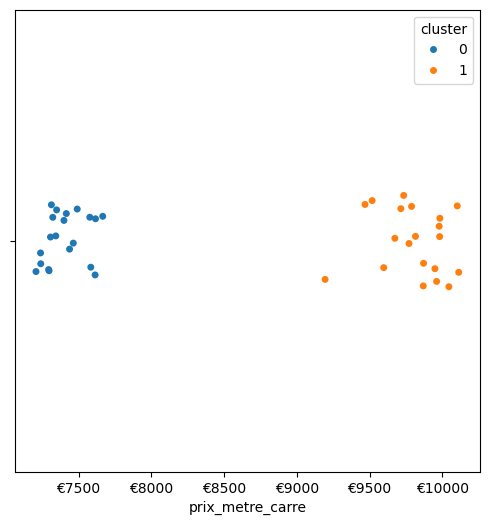

In [92]:
import seaborn as sns
plt.figure(figsize=(6,6))
sns.stripplot(data=df_classification, x="prix_metre_carre", hue = "cluster")
plt.gca().xaxis.set_major_formatter(formatter)

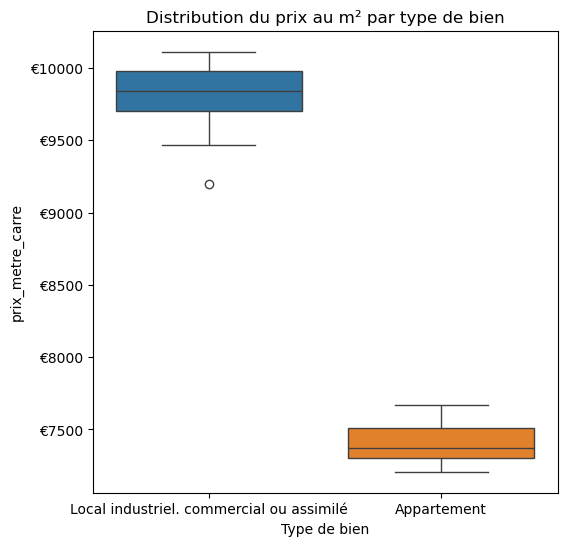

In [93]:
plt.figure(figsize=(6,6))
sns.boxplot(data=df_classification, x ="type_local", y = "prix_metre_carre", palette="tab10")
plt.gca().yaxis.set_major_formatter(formatter)
plt.xlabel("Type de bien")
plt.title("Distribution du prix au m² par type de bien")
plt.show()

# Milestone 5 - Analyse et présentation des résultats

Mes conclusions sur l'analyse et les limites de l'exercice :
- L'algorithme KMeans a permis de classer les biens immobiliers en 2 catégories : Appartements et Locaux industriels ou commerciaux, avec une distinction claire basée sur le prix au m². Ce partitionnement confirme l'hypothèse que les locaux industriels/commerciaux sont souvent plus chers par m² dans un même arrondissement. La valorisation du segment Corporate dépasse celle des Particuliers, soulignant l'importance des biens industriels et commerciaux dans le portefeuille. Il faut en tenir compte pour les objectifs stratégiques.
- Cependant, la classification reste simplifiée, en n'utilisant que le prix au m², sans tenir compte d'autres variables pertinentes (état du bien, dynamique du quartier). De plus, les prédictions basées sur les données historiques nécessiteraient des mises à jour régulières pour rester pertinentes face à l'évolution du marché.